In [1]:
import os
import pandas as pd
import numpy as np



In [2]:
SRC_DIR = os.path.abspath(".")         # endereço do script
BASE_DIR = os.path.dirname(SRC_DIR)
DATA_DIR = os.path.join(BASE_DIR, "data")

In [3]:
data_file = os.path.join(DATA_DIR, 'train.csv')
print(data_file)

/home/fabio/projects/python-projects/Machine_Learning/Titanic/data/train.csv


In [4]:
df = pd.read_csv(data_file)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df = df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include=['O'])

,Sex,Ticket,Embarked
count,891,891,889
unique,2,681,3
top,male,CA. 2343,S
freq,577,7,644


In [10]:
df[df['Age'].isna()].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,male,NaN,0,0,330877,8.4583,Q
17,1,2,male,NaN,0,0,244373,13.0000,S
19,1,3,female,NaN,0,0,2649,7.2250,C
26,0,3,male,NaN,0,0,2631,7.2250,C
28,1,3,female,NaN,0,0,330959,7.8792,Q


In [11]:
print(df[['Sex', 'Age']].groupby('Sex')['Age'].median())
df['Embarked'].mode()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64


0    S
dtype: object

In [12]:
df['Age'] = df.groupby("Sex", as_index=False)['Age'].apply(lambda g: g.fillna(g.median())).reset_index(drop=True)

In [13]:
df = df.fillna({'Embarked':'S'})

In [14]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [15]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', "Fare", 'Embarked']
label = 'Survived'

In [16]:
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder)
onehot = OneHotEncoder()

In [17]:
onehot_arr = onehot.fit_transform(df[['Sex', 'Embarked']]).toarray()
onehot_arr

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [18]:
onehot.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [19]:
df_onehot = pd.DataFrame(onehot_arr, columns=[
    'Sex=female', 'Sex=male', 'Embarked=C', 'Embarked=Q', 'Embarked=S'
]).astype("int")


In [20]:
df_onehot.head()


,Sex=female,Sex=male,Embarked=C,Embarked=Q,Embarked=S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [21]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', "Fare"]
df_features = df[features]
df_features = pd.concat([df_features, df_onehot], axis=1)
df_label = df[label]
df_features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex=female,Sex=male,Embarked=C,Embarked=Q,Embarked=S
0,3,38.0,1,0,7.2500,0,1,0,0,1
1,1,26.0,1,0,71.2833,1,0,1,0,0
2,3,35.0,0,0,7.9250,1,0,0,0,1
3,1,27.0,1,0,53.1000,1,0,0,0,1
4,3,14.0,0,0,8.0500,0,1,0,0,1


In [22]:
X, y = df_features, df_label

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 10) (712,)
(179, 10) (179,)


In [24]:
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier(random_state=123)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [25]:
y_pred=model.predict(X_test)
pred_results = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
pred_results.head()

,y_test,y_pred
172,1,1
524,0,0
452,0,0
170,0,0
620,0,1


In [26]:
titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
titanic_crosstab

y_test,0,1
y_pred,,
0,85,16
1,29,49


In [27]:
from sklearn.metrics import(accuracy_score,
                            precision_score,
                            recall_score,
                            confusion_matrix)

acc = accuracy_score(y_test, y_pred)
print(acc)
prec = precision_score(y_test, y_pred)
print(prec)
recall = recall_score(y_test, y_pred)
print(recall)

0.7486033519553073
0.6282051282051282
0.7538461538461538


In [28]:
from sklearn.model_selection import cross_val_score

acc_list = cross_val_score(model, X_train, y_train, cv=5)
result = round(np.mean(acc_list*100), 3)
print(f"The average accuracy is {result:.2f}%")

The average accuracy is 72.89%


In [29]:
import matplotlib.pyplot as plt 
from sklearn import tree

In [30]:
titanic_tree = model
titanic_tree.feature_importances_

array([0.10668755, 0.18695738, 0.0279582 , 0.05161272, 0.29229147,
       0.29995976, 0.        , 0.01126825, 0.00491404, 0.01835063])

In [31]:
previsores= df_features.columns.tolist()
previsores

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex=female',
 'Sex=male',
 'Embarked=C',
 'Embarked=Q',
 'Embarked=S']

[Text(773.4484863281249, 3984.340909090909, 'Sex=female <= 0.5\ngini = 0.475\nsamples = 712\nvalue = [435, 277]'),
 Text(365.7590650475543, 3799.022727272727, 'Pclass <= 1.5\ngini = 0.314\nsamples = 461\nvalue = [371, 90]'),
 Text(84.66032608695652, 3613.7045454545455, 'Fare <= 26.144\ngini = 0.469\nsamples = 96\nvalue = [60, 36]'),
 Text(74.55163043478261, 3428.3863636363635, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(94.76902173913042, 3428.3863636363635, 'Fare <= 27.135\ngini = 0.483\nsamples = 88\nvalue = [52, 36]'),
 Text(40.43478260869565, 3243.068181818182, 'Age <= 48.5\ngini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(30.326086956521735, 3057.75, 'Fare <= 26.469\ngini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(20.217391304347824, 2872.431818181818, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(40.43478260869565, 2872.431818181818, 'Age <= 36.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(30.326086956521735, 2687.1136363636365, 'Age <= 33.0\ngini = 0.

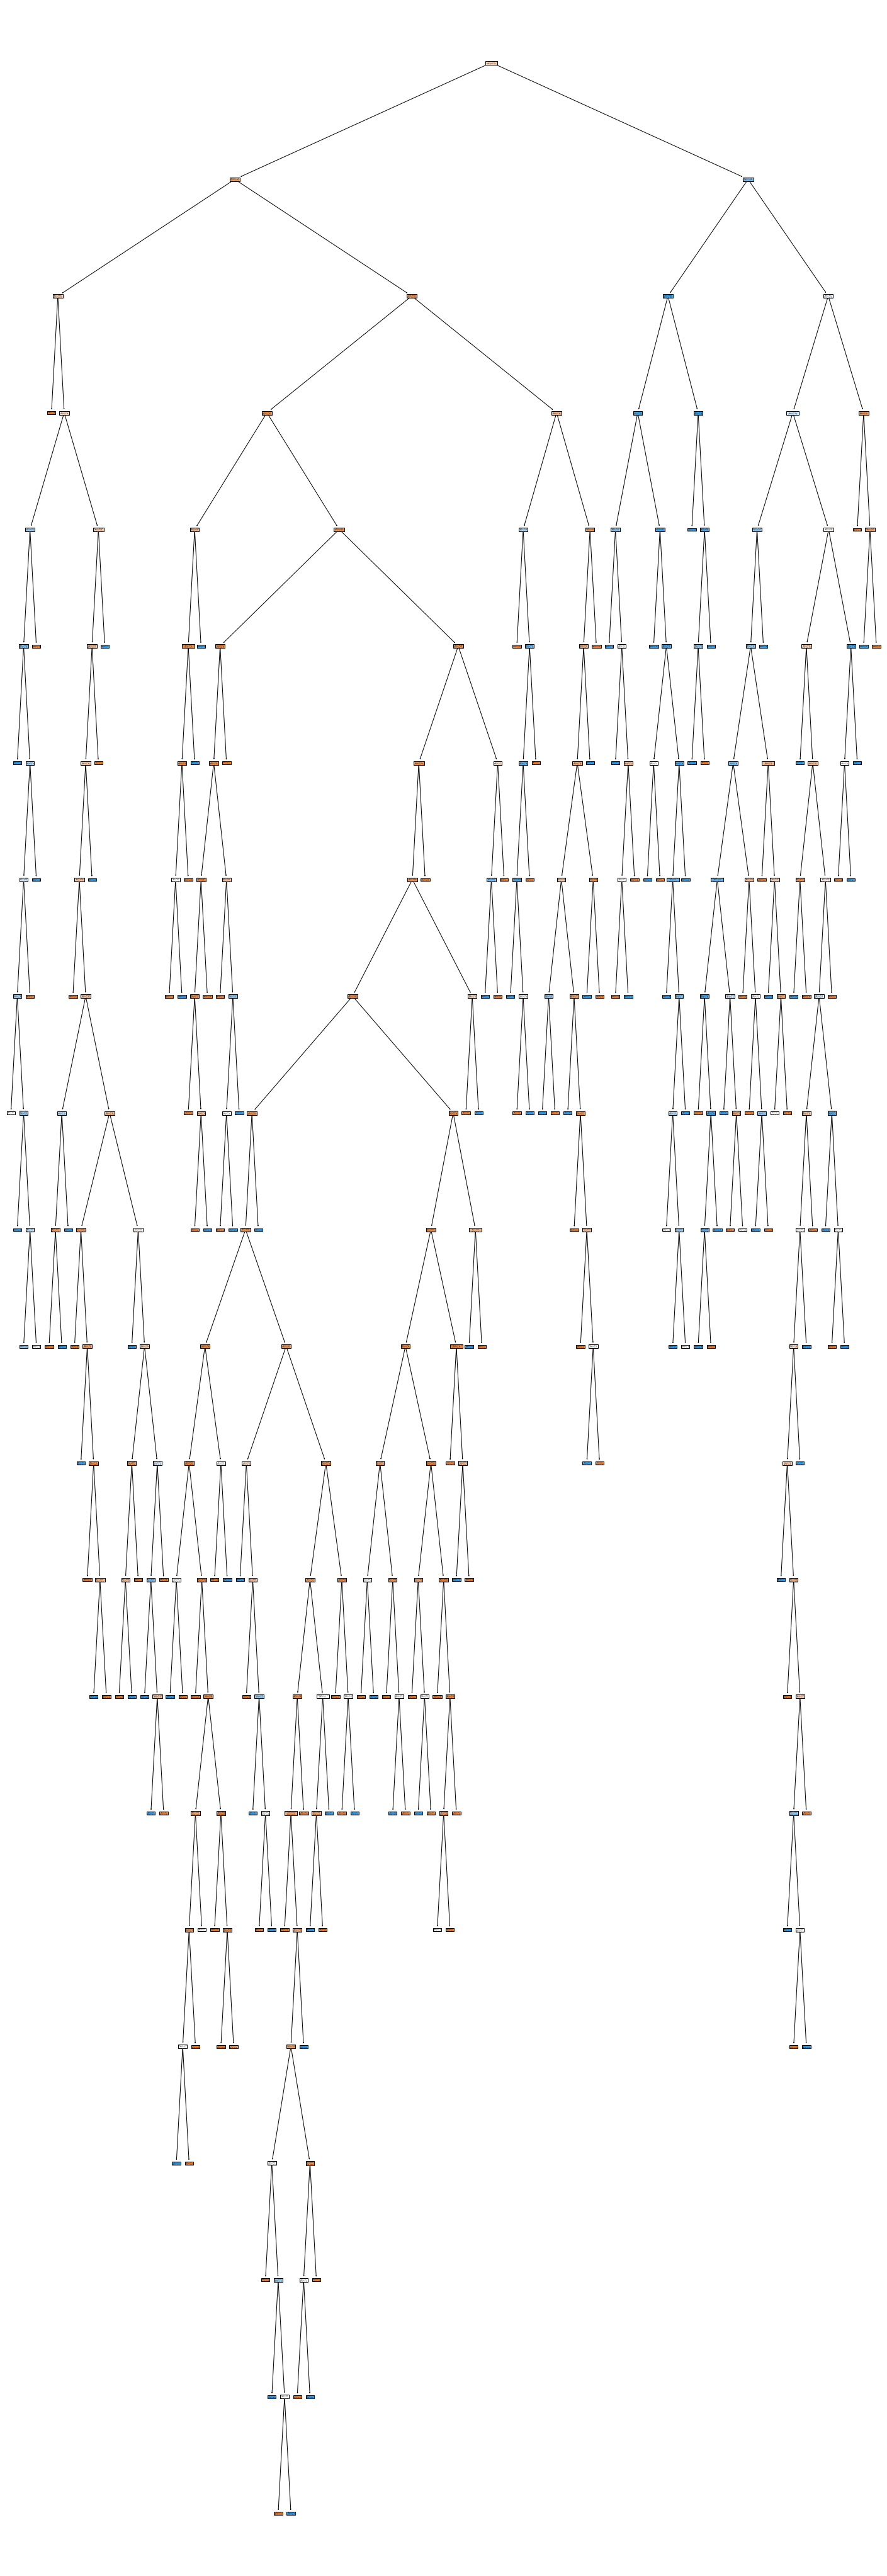

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 75))
tree.plot_tree(
    titanic_tree,
    feature_names=previsores,
    filled=True)